In [26]:
import pandas as pd
import numpy as np

In [27]:
url = 'https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv'
df = pd.read_csv(url)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [29]:
ks = range(2,11)

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

In [32]:
score = silhouette_score(x, kmeans.labels_)
score

np.float64(0.4937945814354117)

In [33]:
silhouette_scores = []
inertia_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_scores.append(score)
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)
    print(f'For k={k}, Inertia={inertia:.3f}, Silhouette Score={score:.3f}')

For k=2, Inertia=183653.329, Silhouette Score=0.396
For k=3, Inertia=106348.373, Silhouette Score=0.468
For k=4, Inertia=73880.645, Silhouette Score=0.494
For k=5, Inertia=44448.455, Silhouette Score=0.554
For k=6, Inertia=40825.169, Silhouette Score=0.513
For k=7, Inertia=33642.579, Silhouette Score=0.502
For k=8, Inertia=26686.838, Silhouette Score=0.496
For k=9, Inertia=24766.472, Silhouette Score=0.456
For k=10, Inertia=23103.122, Silhouette Score=0.443


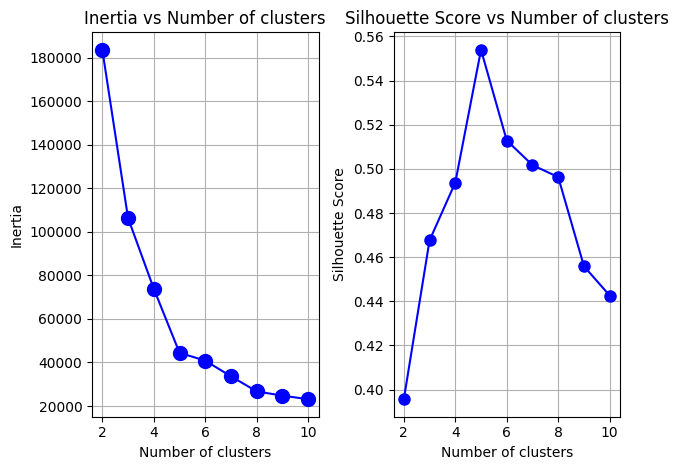

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1, 2, 1)
plt.plot(ks, inertia_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [41]:
cluster_labels = kmeans.predict(x)
cluster_labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

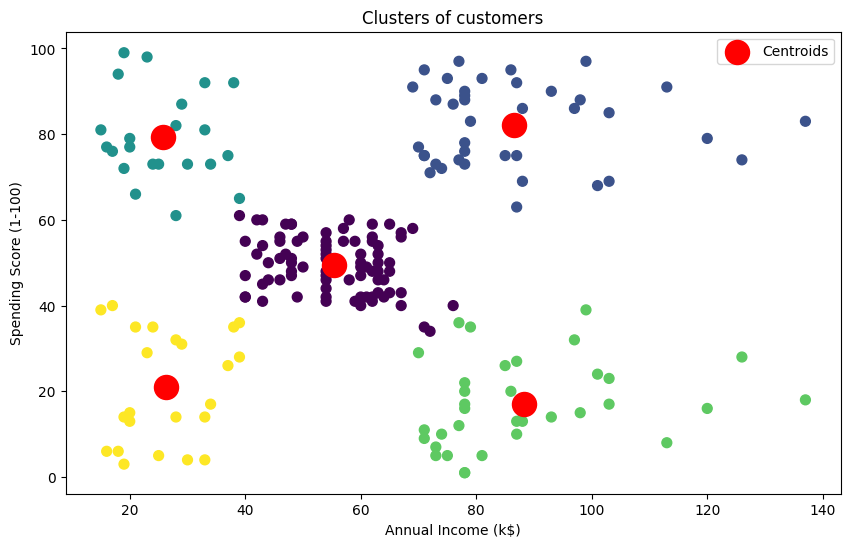

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.legend()